In [56]:
from airflow import DAG
from airflow.utils.dates import days_ago
from airflow.operators.python import PythonOperator
import datetime
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import plotly.express as px

In [232]:
klin_conn = {
    'host': '51.158.67.16', #db in prod, '51.158.67.16'
    'user': 'root',
    'password': 'password',
    'database': 'klines_history',
    'port': "3306",
    'auth_plugin': 'mysql_native_password'
}


In [233]:
def sql_to_df(connector, table):    
    connexion = mysql.connector.connect(**connector)
    curseur = connexion.cursor()
    requete_sql = f"SELECT * FROM {table} WHERE TimeStep != 'WEEKLY'"
    curseur.execute(requete_sql)
    dataframe = pd.DataFrame(curseur.fetchall(), columns=curseur.column_names)
    curseur.close()
    connexion.close()
    return dataframe

def get_result():
    df_klines = sql_to_df(klin_conn, 'klines')
    df_predictions = sql_to_df(klin_conn, 'predictions')

    df_work = df_predictions.merge(right = df_klines, on = ['Symbol', 'TimeStep', 'OpenTime'], how = 'left')
    df_work['precision'] = abs((df_work['ClosePrice_y'] - df_work['ClosePrice_x']) / df_work['ClosePrice_y']) * 100

    result = round(df_work['precision'].mean(),2)
    print('erreur moyenne calculee : ' + str(result) + '%')

,Symbol,TimeStep,OpenTime,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume
7,ADAUSDT,MINUTELY,2023-09-19 19:23:00,0.2558,0.2558,0.2558,0.2558,719.80000
14855,BNBUSDT,MINUTELY,2023-09-19 19:23:00,217.3000,217.4000,217.2000,217.4000,325.24000
29703,BTCUSDT,MINUTELY,2023-09-19 19:23:00,27163.7300,27170.4300,27159.9300,27170.4300,11.76027
44551,ETHUSDT,MINUTELY,2023-09-19 19:23:00,1646.1500,1646.2400,1645.8000,1646.2400,43.36160
59399,XRPUSDT,MINUTELY,2023-09-19 19:23:00,0.5114,0.5119,0.5114,0.5118,61939.00000


In [234]:
get_result()

erreur moyenne calculee : 50.39%


In [241]:
df_klines = sql_to_df(klin_conn, 'klines')
df_predictions = sql_to_df(klin_conn, 'predictions')

df_work = df_predictions.merge(right = df_klines, on = ['Symbol', 'TimeStep', 'OpenTime'], how = 'left')
df_work['precision'] = abs((df_work['ClosePrice_y'] - df_work['ClosePrice_x']) / df_work['ClosePrice_y']) * 100

In [249]:
df_work['TimeStep'].value_counts()

TimeStep
MINUTELY    2110
HOURLY        55
DAILY         20
Name: count, dtype: int64

In [255]:
df_predictions[df_predictions['TimeStep'] == 'DAILY']

,Symbol,TimeStep,InTime,OpenTime,PctChange,ClosePrice
433,ADAUSDT,DAILY,2023-09-29 15:46:04,2023-09-30 02:00:00,0.021797,0.250851
434,ADAUSDT,DAILY,2023-09-29 15:46:04,2023-10-01 02:00:00,0.037363,0.253739
435,ADAUSDT,DAILY,2023-09-29 15:46:04,2023-10-02 02:00:00,0.035240,0.257671
436,ADAUSDT,DAILY,2023-09-29 15:46:04,2023-10-03 02:00:00,0.048917,0.265586
870,BNBUSDT,DAILY,2023-09-29 15:46:04,2023-09-30 02:00:00,0.194406,253.930735
871,BNBUSDT,DAILY,2023-09-29 15:46:04,2023-10-01 02:00:00,0.220848,258.819794
872,BNBUSDT,DAILY,2023-09-29 15:46:04,2023-10-02 02:00:00,0.215201,261.268175
873,BNBUSDT,DAILY,2023-09-29 15:46:04,2023-10-03 02:00:00,0.227010,264.788802
1307,BTCUSDT,DAILY,2023-09-29 15:46:04,2023-09-30 02:00:00,-0.262606,19335.697565
1308,BTCUSDT,DAILY,2023-09-29 15:46:04,2023-10-01 02:00:00,-0.264980,19384.685633


In [248]:
df_work_graph = df_work.dropna()
df_work_graph.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2125 entries, 0 to 2176
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Symbol        2125 non-null   object        
 1   TimeStep      2125 non-null   object        
 2   InTime        2125 non-null   datetime64[ns]
 3   OpenTime      2125 non-null   datetime64[ns]
 4   PctChange     2125 non-null   float64       
 5   ClosePrice_x  2125 non-null   float64       
 6   OpenPrice     2125 non-null   float64       
 7   HighPrice     2125 non-null   float64       
 8   LowPrice      2125 non-null   float64       
 9   ClosePrice_y  2125 non-null   float64       
 10  Volume        2125 non-null   float64       
 11  precision     2125 non-null   float64       
dtypes: datetime64[ns](2), float64(8), object(2)
memory usage: 215.8+ KB


In [238]:
df_work_graph['TimeStep'].unique()

array(['MINUTELY', 'HOURLY'], dtype=object)

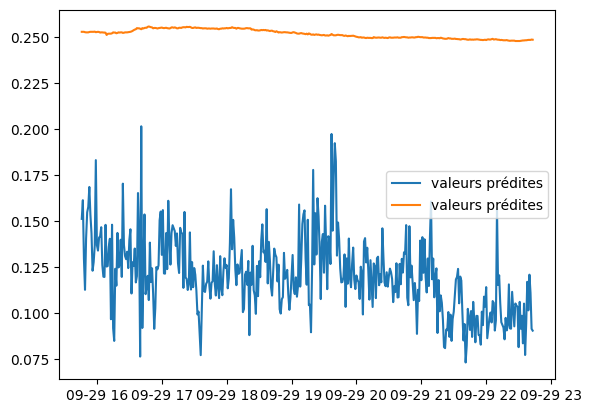

In [254]:
df_work_graph[(df_work_graph['Symbol'] == 'ADAUSDT') & (df_work_graph['TimeStep'] == 'MINUTELY')]['OpenTime']
plt.plot(df_work_graph[(df_work_graph['Symbol'] == 'ADAUSDT') & (df_work_graph['TimeStep'] == 'MINUTELY')]['OpenTime'], df_work_graph[(df_work_graph['Symbol'] == 'ADAUSDT') & (df_work_graph['TimeStep'] == 'MINUTELY')]['ClosePrice_x'], label = "valeurs prédites")
plt.plot(df_work_graph[(df_work_graph['Symbol'] == 'ADAUSDT') & (df_work_graph['TimeStep'] == 'MINUTELY')]['OpenTime'], df_work_graph[(df_work_graph['Symbol'] == 'ADAUSDT') & (df_work_graph['TimeStep'] == 'MINUTELY')]['ClosePrice_y'], label = "valeurs prédites")
plt.legend()

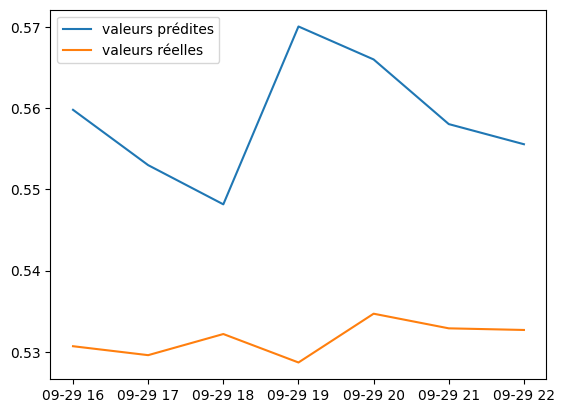

In [240]:
plt.plot(df_work_graph[(df_work_graph['Symbol'] == 'XRPUSDT') & (df_work_graph['TimeStep'] == 'HOURLY')]['OpenTime'], df_work_graph[(df_work_graph['Symbol'] == 'XRPUSDT') & (df_work_graph['TimeStep'] == 'HOURLY')]['ClosePrice_x'], label = "valeurs prédites")
plt.plot(df_work_graph[(df_work_graph['Symbol'] == 'XRPUSDT') & (df_work_graph['TimeStep'] == 'HOURLY')]['OpenTime'], df_work_graph[(df_work_graph['Symbol'] == 'XRPUSDT') & (df_work_graph['TimeStep'] == 'HOURLY')]['ClosePrice_y'], label = "valeurs réelles")
plt.legend()

In [215]:
result = df_work[['Symbol', 'TimeStep', 'precision']].groupby(by=['Symbol', 'TimeStep']).mean()

In [214]:
result

precision  ClosePrice_x  ClosePrice_y
Symbol  TimeStep                                       
ADAUSDT DAILY     18.397730      0.261785      0.246490
        HOURLY    36.806772      0.170879      0.247226
        MINUTELY   9.559491      0.252088      0.247227
BNBUSDT DAILY     16.058724    233.050793    212.080000
        HOURLY    30.927053    157.739729    212.347325
        MINUTELY  10.977666    228.375902    212.338212
BTCUSDT DAILY      6.876061  28624.697614  26547.413000
        HOURLY    32.818954  33833.483907  26614.807407
        MINUTELY  10.202802  24282.949241  26615.908432
ETHUSDT DAILY     10.133195   1506.241533   1605.195000
        HOURLY     6.628481   1592.619562   1607.783045
        MINUTELY  12.552143   1649.806935   1607.680441
XRPUSDT DAILY     17.841656      0.487759      0.505900
        HOURLY    14.469246      0.576717      0.508177
        MINUTELY   5.714923      0.505025      0.508205

In [157]:
result = result.reset_index()

In [158]:
result

,Symbol,TimeStep,precision
0,ADAUSDT,DAILY,18.397730
1,ADAUSDT,HOURLY,36.929050
2,ADAUSDT,MINUTELY,9.589811
3,BNBUSDT,DAILY,16.058724
4,BNBUSDT,HOURLY,31.043771
5,BNBUSDT,MINUTELY,10.870495
6,BTCUSDT,DAILY,6.876061
7,BTCUSDT,HOURLY,32.913284
8,BTCUSDT,MINUTELY,10.093134
9,ETHUSDT,DAILY,10.133195


In [159]:
for row in result.iterrows():
    print(row['Symbol'], row['TimeStep'], round(row['precision'],2))

TypeError: tuple indices must be integers or slices, not str

In [160]:
query = """
CREATE TABLE IF NOT EXISTS hist_detailed_precision (
    id INT AUTO_INCREMENT PRIMARY KEY,
    date DATETIME,
    Symbol VARCHAR(255),
    TimeStep VARCHAR(255),
    Precision DOUBLE
)
"""

In [161]:
query = f"""
CREATE TABLE IF NOT EXISTS hist_global_precision (
    id INT AUTO_INCREMENT PRIMARY KEY,
    date DATETIME,
    Precision DOUBLE
)
"""

In [162]:
df_precision = sql_to_df(klin_conn, "hist_detailed_precision")

In [163]:
df_precision

,id,date,symbol,timestep,precision_rate
0,1,2023-09-29 07:11:48,ADAUSDT,DAILY,18.40
1,2,2023-09-29 07:11:48,ADAUSDT,HOURLY,38.07
2,3,2023-09-29 07:11:48,ADAUSDT,MINUTELY,9.33
3,5,2023-09-29 07:11:48,BNBUSDT,DAILY,16.06
4,6,2023-09-29 07:11:48,BNBUSDT,HOURLY,32.35
...,...,...,...,...,...
10750,12191,2023-09-29 19:18:02,ETHUSDT,HOURLY,6.60
10751,12192,2023-09-29 19:18:02,ETHUSDT,MINUTELY,12.37
10752,12193,2023-09-29 19:18:02,XRPUSDT,DAILY,17.84
10753,12194,2023-09-29 19:18:02,XRPUSDT,HOURLY,14.45


In [164]:
df_precision[(df_precision['symbol'] == 'ETHUSDT') & (df_precision['timestep'] == 'ETHUSDT')]['precision_rate']

Series([], Name: precision_rate, dtype: float64)

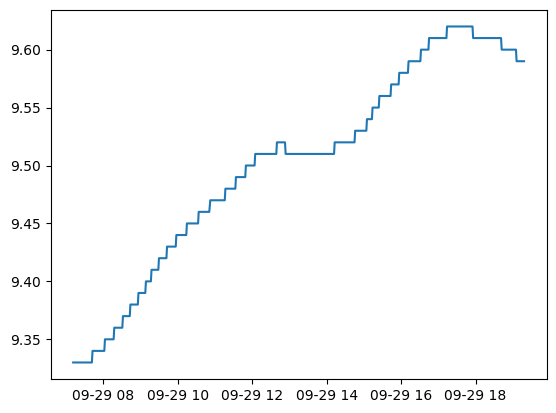

In [165]:
plt.plot(df_precision[(df_precision['symbol'] == 'ADAUSDT') & (df_precision['timestep'] == 'MINUTELY')]['date'], df_precision[(df_precision['symbol'] == 'ADAUSDT') & (df_precision['timestep'] == 'MINUTELY')]['precision_rate'])

In [166]:
len(df_precision['symbol'].unique())

5

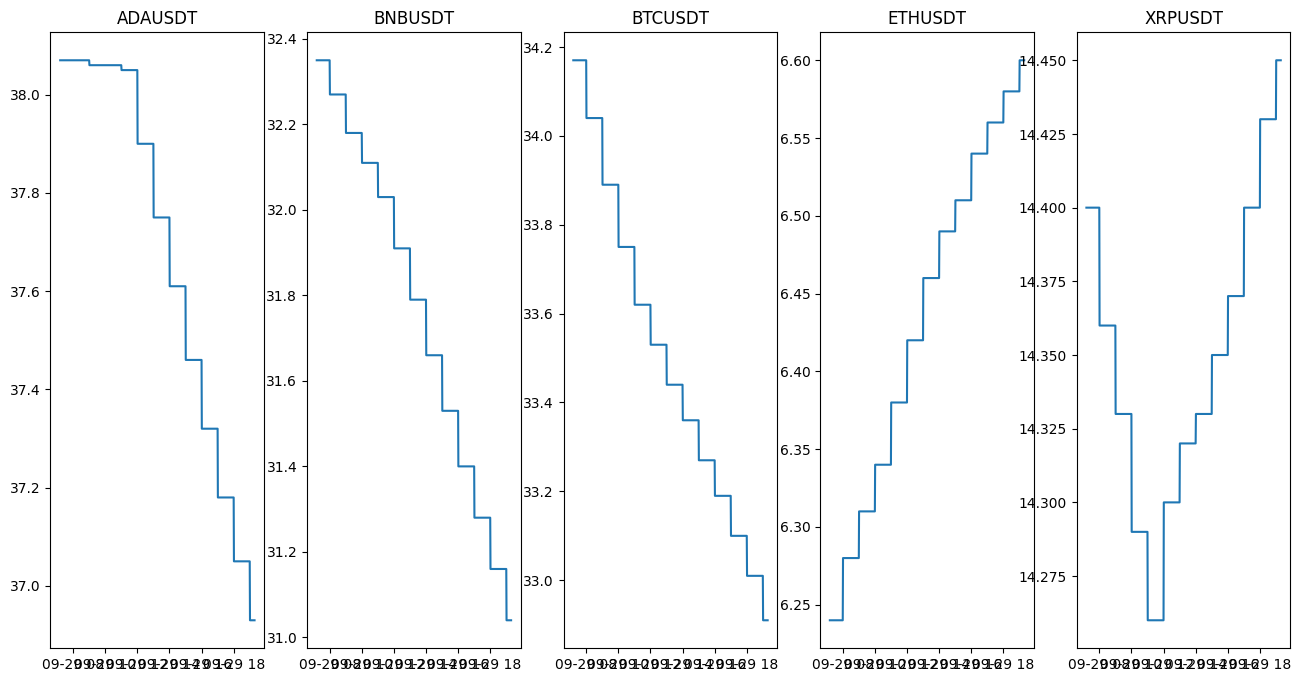

In [169]:
plt.figure(figsize=(16,8))

for index, symbol in enumerate(df_precision['symbol'].unique()):
    plt.subplot(1,len(df_precision['symbol'].unique()), index +1)
    plt.plot(df_precision[(df_precision['symbol'] == symbol) & (df_precision['timestep'] == 'HOURLY')]['date'], df_precision[(df_precision['symbol'] == symbol) & (df_precision['timestep'] == 'HOURLY')]['precision_rate'])
    plt.title(symbol)
    
    

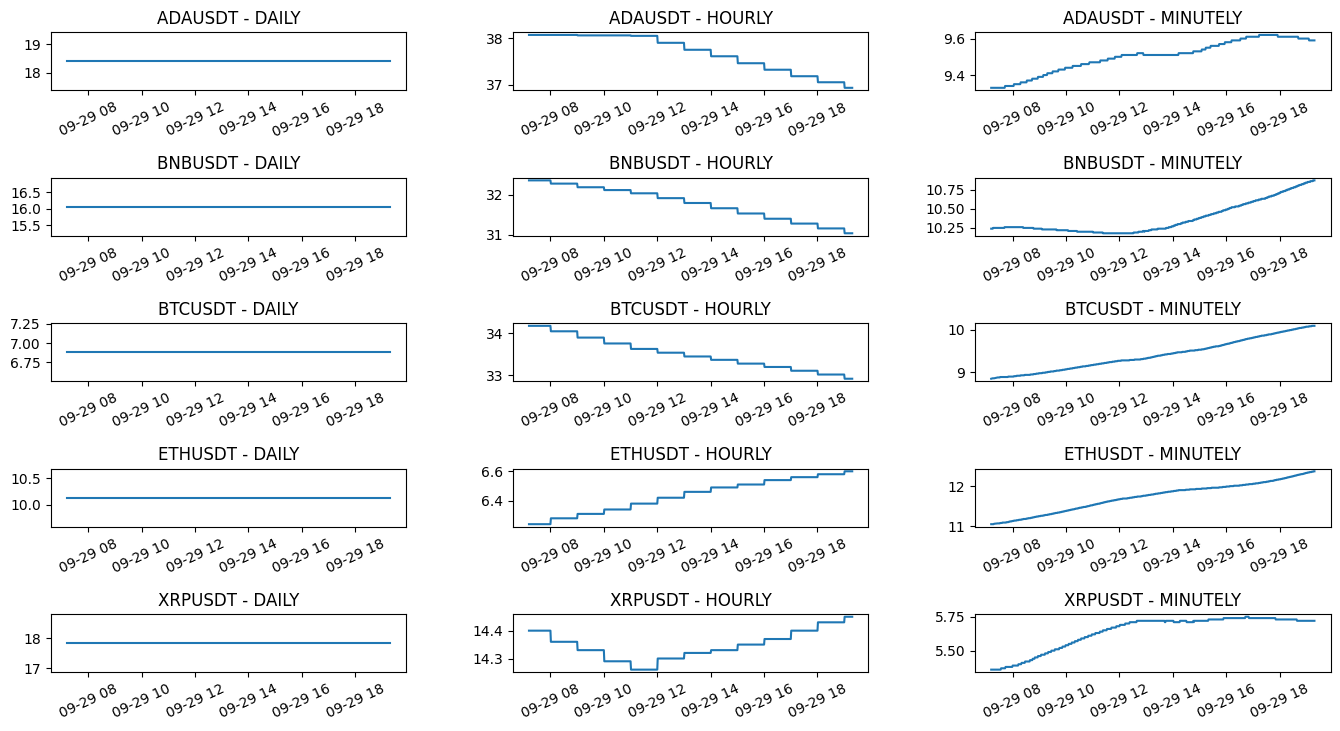

In [206]:
plt.figure(figsize=(16,8))
i = 1

for symbol in df_precision['symbol'].unique():
    for timestep in df_precision['timestep'].unique():
        plt.subplot(len(df_precision['symbol'].unique()),len(df_precision['timestep'].unique()), i )
        plt.plot(df_precision[(df_precision['symbol'] == symbol) & (df_precision['timestep'] == timestep)]['date'], df_precision[(df_precision['symbol'] == symbol) & (df_precision['timestep'] == timestep)]['precision_rate'])
        plt.title(symbol + " - " + timestep)
        plt.xticks(rotation=25)
        i += 1

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=1.5)



In [179]:
len(df_precision['symbol'].unique())

5